# Non Horizontal Plate

In [1]:
# Import
import cv2
from matplotlib import pyplot as plt

# Display Image
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

def plt_show0(img):
    b,g,r = cv2.split(img)
    img = cv2.merge([r, g, b])
    plt.imshow(img)
    plt.show()
    
def plt_show(img):
    plt.imshow(img,cmap='gray')
    plt.show()  

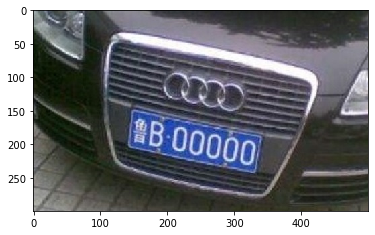

In [2]:
# Load Image
rawImage = cv2.imread("./image/test3.png")
plt_show0(rawImage)

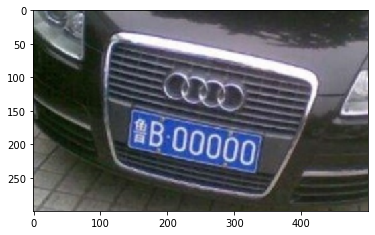

In [3]:
# Gaussian
image = cv2.GaussianBlur(rawImage, (3, 3), 0)
plt_show0(image)

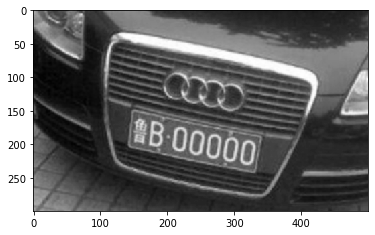

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt_show(gray_image)

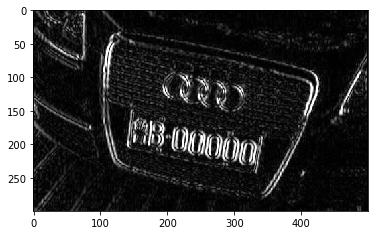

In [5]:
# sobel
Sobel_x = cv2.Sobel(gray_image, cv2.CV_16S, 1, 0)
# Sobel_y = cv2.Sobel(image, cv2.CV_16S, 0, 1)
absX = cv2.convertScaleAbs(Sobel_x)  # uint8
# absY = cv2.convertScaleAbs(Sobel_y)
# dst = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
image = absX
plt_show(image)

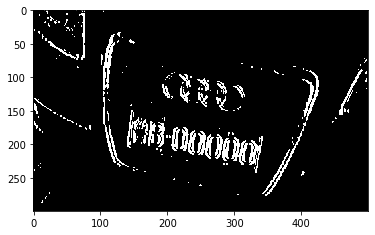

In [6]:
# Threshold
ret, image = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)
plt_show(image)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


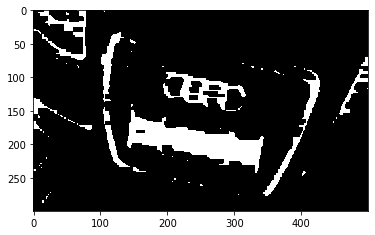

In [7]:
# close operation
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (14, 5))
print(kernelX)

image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernelX,iterations = 1)
plt_show(image)

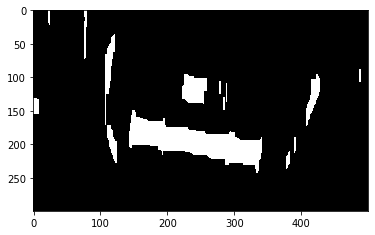

In [8]:
# Eliminate some white spots
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 1))
kernelY = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 19))

# Dilate, erode
image = cv2.dilate(image, kernelX)
image = cv2.erode(image, kernelX)
# Erode, dilate
image = cv2.erode(image, kernelY)
image = cv2.dilate(image, kernelY)

plt_show(image)

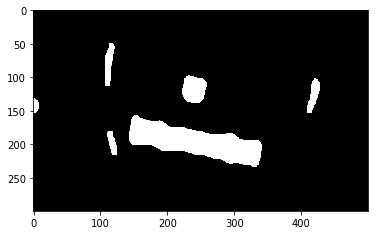

In [9]:
# median blur
image = cv2.medianBlur(image, 15)
plt_show(image)

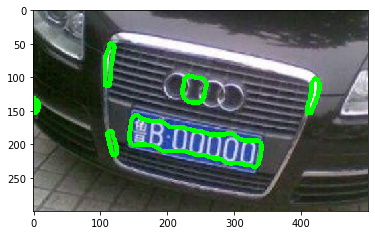

In [10]:
contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Plot contour
image1 = rawImage.copy()
cv2.drawContours(image1, contours, -1, (0, 255, 0), 5)
plt_show0(image1)

1


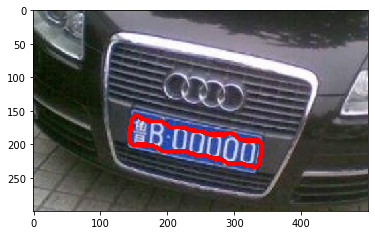

In [11]:
# Same logic as previous
for index,item in enumerate(contours):
    rect = cv2.boundingRect(item)
    x = rect[0]
    y = rect[1]
    weight = rect[2]
    height = rect[3]
    # 440mm×140mm
    if (weight > (height * 2.5)) and (weight < (height * 4)):
        print(index)
        image2 = rawImage.copy()
        cv2.drawContours(image2, contours, 1, (0, 0, 255), 5)
        plt_show0(image2)

In [12]:
contours[1]

array([[[153, 156]],

       [[152, 157]],

       [[151, 157]],

       [[148, 160]],

       [[148, 161]],

       [[147, 162]],

       [[147, 164]],

       [[146, 165]],

       [[146, 171]],

       [[145, 172]],

       [[145, 180]],

       [[144, 181]],

       [[144, 195]],

       [[145, 196]],

       [[145, 197]],

       [[148, 200]],

       [[149, 200]],

       [[150, 201]],

       [[153, 201]],

       [[154, 200]],

       [[169, 200]],

       [[170, 201]],

       [[176, 201]],

       [[177, 202]],

       [[179, 202]],

       [[180, 203]],

       [[181, 203]],

       [[182, 204]],

       [[183, 204]],

       [[184, 205]],

       [[185, 205]],

       [[186, 206]],

       [[187, 206]],

       [[189, 208]],

       [[190, 208]],

       [[191, 209]],

       [[192, 209]],

       [[193, 210]],

       [[226, 210]],

       [[227, 211]],

       [[231, 211]],

       [[232, 212]],

       [[233, 212]],

       [[234, 213]],

       [[236, 213]],

       [[2

## Fitline to get a angle of non horizontal
output ：
   - 4 dimension output, first two represents the direction of line, last two represents two point on the line
   - (vx, vy) is direction，(x, y) is a point on the line
   - k = vy / vx
   - b = y - k * x

[array([0.9724686], dtype=float32), array([0.23303394], dtype=float32), array([241.13939], dtype=float32), array([196.93939], dtype=float32)]
[0.23963133] [139.15485]


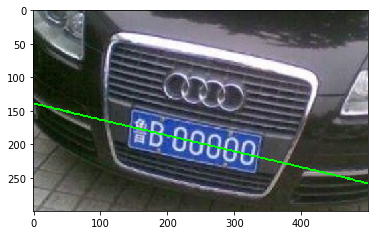

(500, array([258.97052], dtype=float32))
(0, array([139.15485], dtype=float32))


In [14]:
#Using fitline func and euro distance to fit a contour to a line
cnt = contours[1]
image3 = rawImage.copy()

h, w = image3.shape[:2]
[vx, vy, x, y] = cv2.fitLine(cnt, cv2.DIST_L2, 0, 0.01, 0.01)
print([vx, vy, x, y])

k = vy/vx
b = y-k*x

print(k,b)

lefty = b
righty = k*w+b

img = cv2.line(image3, (w, righty), (0, lefty), (0, 255, 0), 2)

plt_show0(img)

print((w, righty))
print((0, lefty))

In [18]:
import math
a = math.atan(k)
a

0.23519635569664088

In [19]:
a = math.degrees(a)
a

13.475758538275219

300 500


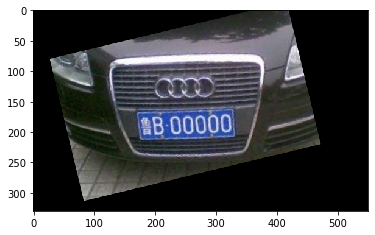

In [21]:
image4 = rawImage.copy()
# Rotate picture
h,w = image1.shape[:2]
print(h,w)
#w/2,h/2 is the center for rotating, a is angle
M = cv2.getRotationMatrix2D((w/2,h/2),a,0.8)
#0.8 is the size of the image
dst = cv2.warpAffine(image4,M,(int(w*1.1),int(h*1.1)))
plt_show0(dst)

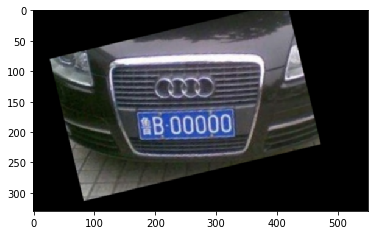

In [22]:
image = cv2.GaussianBlur(dst, (3, 3), 0)
plt_show0(image)

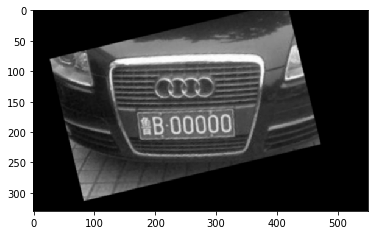

In [23]:
# gray
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt_show(gray_image)

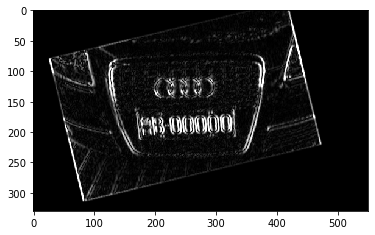

In [24]:
#same as previous
Sobel_x = cv2.Sobel(gray_image, cv2.CV_16S, 1, 0)
# Sobel_y = cv2.Sobel(image, cv2.CV_16S, 0, 1)
absX = cv2.convertScaleAbs(Sobel_x) 
# absY = cv2.convertScaleAbs(Sobel_y)
# dst = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
image = absX
plt_show(image)

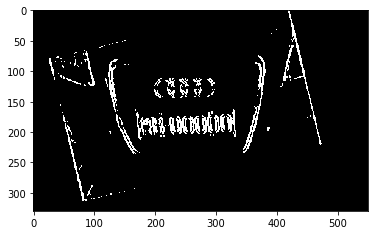

In [25]:
# threshold
ret, image = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)
plt_show(image)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


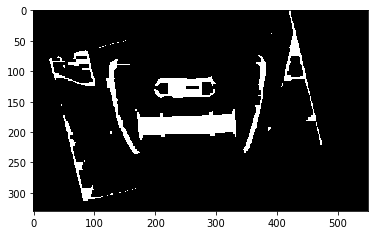

In [26]:
# close operation
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (14, 5))
print(kernelX)
image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernelX,iterations = 1)
plt_show(image)

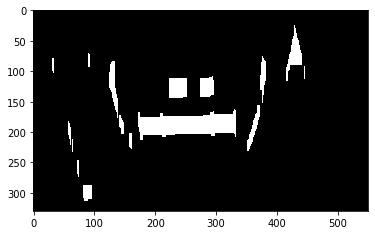

In [27]:
# Eliminate some spots
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 1))
kernelY = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 19))

# Dilate and erode
image = cv2.dilate(image, kernelX)
image = cv2.erode(image, kernelX)
# Erode and diltate
image = cv2.erode(image, kernelY)
image = cv2.dilate(image, kernelY)

plt_show(image)

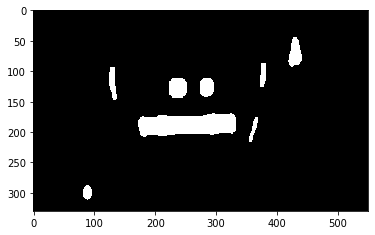

In [28]:
# Median blur
image = cv2.medianBlur(image, 15)
plt_show(image)

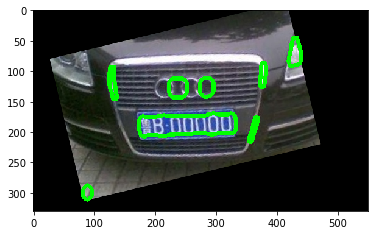

In [29]:
#same as previous
contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# plot contour
image1 = dst.copy()
cv2.drawContours(image1, contours, -1, (0, 255, 0), 5)
plt_show0(image1)

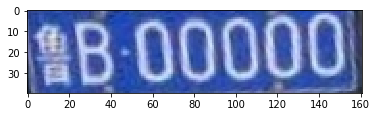

In [30]:
c = None
i = None
# same as previous
for item in contours:
    # cv2.boundingRect用一个最小的矩形，把找到的形状包起来
    rect = cv2.boundingRect(item)
    x = rect[0]
    y = rect[1]
    weight = rect[2]
    height = rect[3]
    # 440mm×140mm
    if (weight > (height * 2.5)) and (weight < (height * 5)):
        c=rect
        i = item
        image = dst[y:y + height, x:x + weight]
#         cv_show('image',image)
        # Save image
        plt_show0(image)
        cv2.imwrite('./car_license/test3.png', image)
    